## Desafío entregable #9: Obtención de insights
---

In [1]:
import matplotlib.pyplot as plt
import missingno as msno
import pandas as pd
import seaborn as sns
from statistics import median
from wordcloud import WordCloud

## 1. Introducción <a class="anchor" id="intro"></a>
---

La industria de la música no es ajena a la innovación tecnológica: la revolución digital y la masificación del acceso del internet cambiaron las reglas del juego. Los servicios de streamming de música y podcasts hoy son la norma. Spotify, YouTube Music, Tidal y otros, compiten por liderar el mercado en donde implementar soluciones tecnológicas les permite destacarse por sobre las demás. Estos servicios deben atraer clientes y mantenerlos interesados mediante el uso sencillo e intuitivo de sus sistemas, de forma que les premita acceder a sus artistas y canciones favoritas mientras descubren nuevos géneros y tendencias musicales. Para dicha tarea son cruciales los sistemas de clasificación y recomendación de canciones en función de los gustos y preferencias de los clientes. En este terreno los algoritmos de aprendizaje automático lucen toda su potencia.

En el presente trabajo analizaremos una selección de canciones del servicio Spotify. Para ello, se realizará un análisis exploratorio para evaluar si la aplicación de algoritmos de clasificación y de clustering nos permitirian cumplir nuestros objetivos.

## Índice
---

* [1. Introducción](#intro)
* [2. Contexto](#contexto)
* [3. Preguntas de interés](#preguntas)
* [4. Primera inspección de los datos](#inspeccion)
* [5. Limpieza de los datos](#limpieza)
    * [5.1. Datos nulos](#nulos)
    * [5.2. Datos duplicados](#duplicados)
* [6. Popularidad](#popularidad)
    * [6.1. Géneros](#pop_generos)
    * [6.2. Artistas](#pop_artistas)
    * [6.3. Canciones](#pop_canciones)
* [7. Duración](#duracion)
* [8. Letras explícitas](#explicito)
* [9. Gráficos de cajas de las variables](#cajas)
* [10. Histogramas de frecuencias de las variables](#histogramas)
* [11. Correlaciones entre las variables](#correlaciones)
* [12. Insights y recomendaciones](#insights)

## 2. Contexto <a class="anchor" id="contexto"></a>
---

A los fines de atraer clientes y lograr su permanencia en el mismo, Spotify debe ofrecer una amplia variedad de géneros, artistas y canciones, junto con un sistema sencillo e intuitivo de usar. En este último ítem se encuentra el sistema de recomendación de canciones. Por otro lado, el servicio debe ser atractivo también para los artistas, atrayéndolos para que publiquen sus canciones en la plataforma. Para ello son cruciales los mecanismos que les den visibilidad dentro de la plataforma.

Surge la inquietud de definir un sistema de recomendación que fidelice tanto a los clientes como a los artistas. Para ello se propone un sistema de clasificación y de recomendación que ofrezca canciones que sean del agrado de los clientes y que además, recomiende canciones de artistas nuevos. El objetivo es ampliar el número de artistas que los clientes escuchan, encontrando el balance entre artistas nuevos y artistas ya establecidos. Lo anterior busca dar más visibilidad a los intérpretes a la vez que brinda novedades a los clientes, manteniendo así su atención.

El sistema de clasificación y de recomendación se basará fuertemente en las semejanzas y diferencias estadísticas y las correlaciones entre las variables que componen el dataset. La información disponible se analizará buscando identificar semejanzas y diferencias entre las canciones y géneros musicales, evaluando si estas podrían dar sustento al mencionado sistema de recomendación.

## 3. Preguntas de interés <a class="anchor" id="preguntas"></a>
---

Se plantean una serie de hipótesis que serán resueltas por medio del análisis exploratorio de datos. Las cuatro primeras hacen referencia a interrogantes sobre la factibilidad de desarrolar un sistema de clasificación y/o recomendación. En tanto que las últimas cinco son preguntas de caracter más comercial, extrayendo conclusiones que redunden en una mejor comprensión del comportamiento general del mercado musical. Sin embargo estas últimas preguntas pueden redundar en un mejor sistema de clasificación y/o recomendación.

- ¿Es la muestra representativa del total de las canciones del servicio Spotify?
- ¿Los datos están completos, sin duplicados, y bien formateados?
- ¿Hay diferencias estadísticas significativas entre las variables que clasifican las canciones?
- ¿Cuáles son las correlaciones en los diferentes parámetros?

* ¿Cuáles son los géneros más populares?
* ¿Cuáles son los artistas más populares?
* ¿En que variable se destacan las canciones más populares?
* ¿Qué porcentaje de las canciones tienen letras explícitas?
* ¿Cual es la duración promedio de las canciones?

Estas hipótesis no serán respondidas en el orden en el que fueron planteadas sino de manera orgánica a medida que los datos son analizados.

## 4. Primera inspección de los datos <a class="anchor" id="inspeccion"></a>
---

In [2]:
df = pd.read_csv('Spotify_Track_Dataset.csv')

In [3]:
df.shape

(114000, 21)

In [4]:
df.head(3)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.166,...,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,...,-9.734,1,0.0557,0.2100,0.000000,0.117,0.120,76.332,4,acoustic


El dataset está compuesto por una muestra de 114.000 canciones, la cual cada una de ellas es descripta por 21 variables. Entre dichas variables se encuentra el nombre de la canción, su intérprete, álbum, duración y una serie de parámetros numéricos que dan información sobre el volumen, la energía que transmite, el carácter instrumental, la presencia de palabra hablada o cantanda, entre otras. A continuación se describen algunas de las variables, principalmente aquellas de significados complejos.

- popularity: Popularidad de la canción, toma valores entre 0 y 100, siendo 100 el más popular. 
- explicit: Informa si la canción posee letras explícitas o no.
- danceability: Describe cuan bailable es una canción. 0 indica poco bailable y 1 indica muy bailable.
- energy: Es una medida de la intensidad. Canciones energéticas se sienten rápidas, de volumen alto y ruidosas.
- loudness: Volumen promedio de la canción en decibelios.
- speechiness: Detecta la presencia de palabra hablada. Mientras más palabra hablada posea, más cerca de 1 estará el valor.
- acousticness: Medida desde 0.0 a 1.0 sobre si la canción es acústica, indicando 1.0 que la canción es acústica.
- instrumentalness: Predice si la canción no contiene voces. Mientras más cerca esté de 1.0, mayor es la posibilidad que la canción no contenga voces.
- liveness: Detecta la presencia de audiencia en las canciones. Altos valores indican alta posibilidad de que el tema se interpretó en vivo.
- valence: Medida desde 0.0 a 1.0 describiendo la positividad musical que la canción porta. Canciones con alta valencia suenan más positivas, mientras la baja valencia indica temas más negativos.

In [5]:
print(df['track_genre'].unique())

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

In [6]:
df.groupby('track_genre').size()

track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
trance         1000
trip-hop       1000
turkish        1000
world-music    1000
Length: 114, dtype: int64

Se observa que el dataset está compuesto por mil canciones de cada género musical, esto puede ser positivo por implica que ningun género quede subrepresentado. Leyendo la lista de géneros presentes en el dataset encontramos los géneros más masivos, al menos en Argentina, por ejemplo: rock, pop, hip-hp, latino, reggae, reggaeton, etcétera. Además, el número de canciones es suficiente para obtener buenos parámetros estadísticos de cada género que asistan posteriormente a la formación de un sistema de clasificación.

## 5. Limpieza de los datos <a class="anchor" id="limpieza"></a>
---

El funcionamiento de los algoritmos depende de poseer información libre de valores nulos y repetidos, las siguientes dos subsecciones se focalizan rápidamente en dichos asuntos.

### 5.1. Datos nulos <a class="anchor" id="nulos"></a>

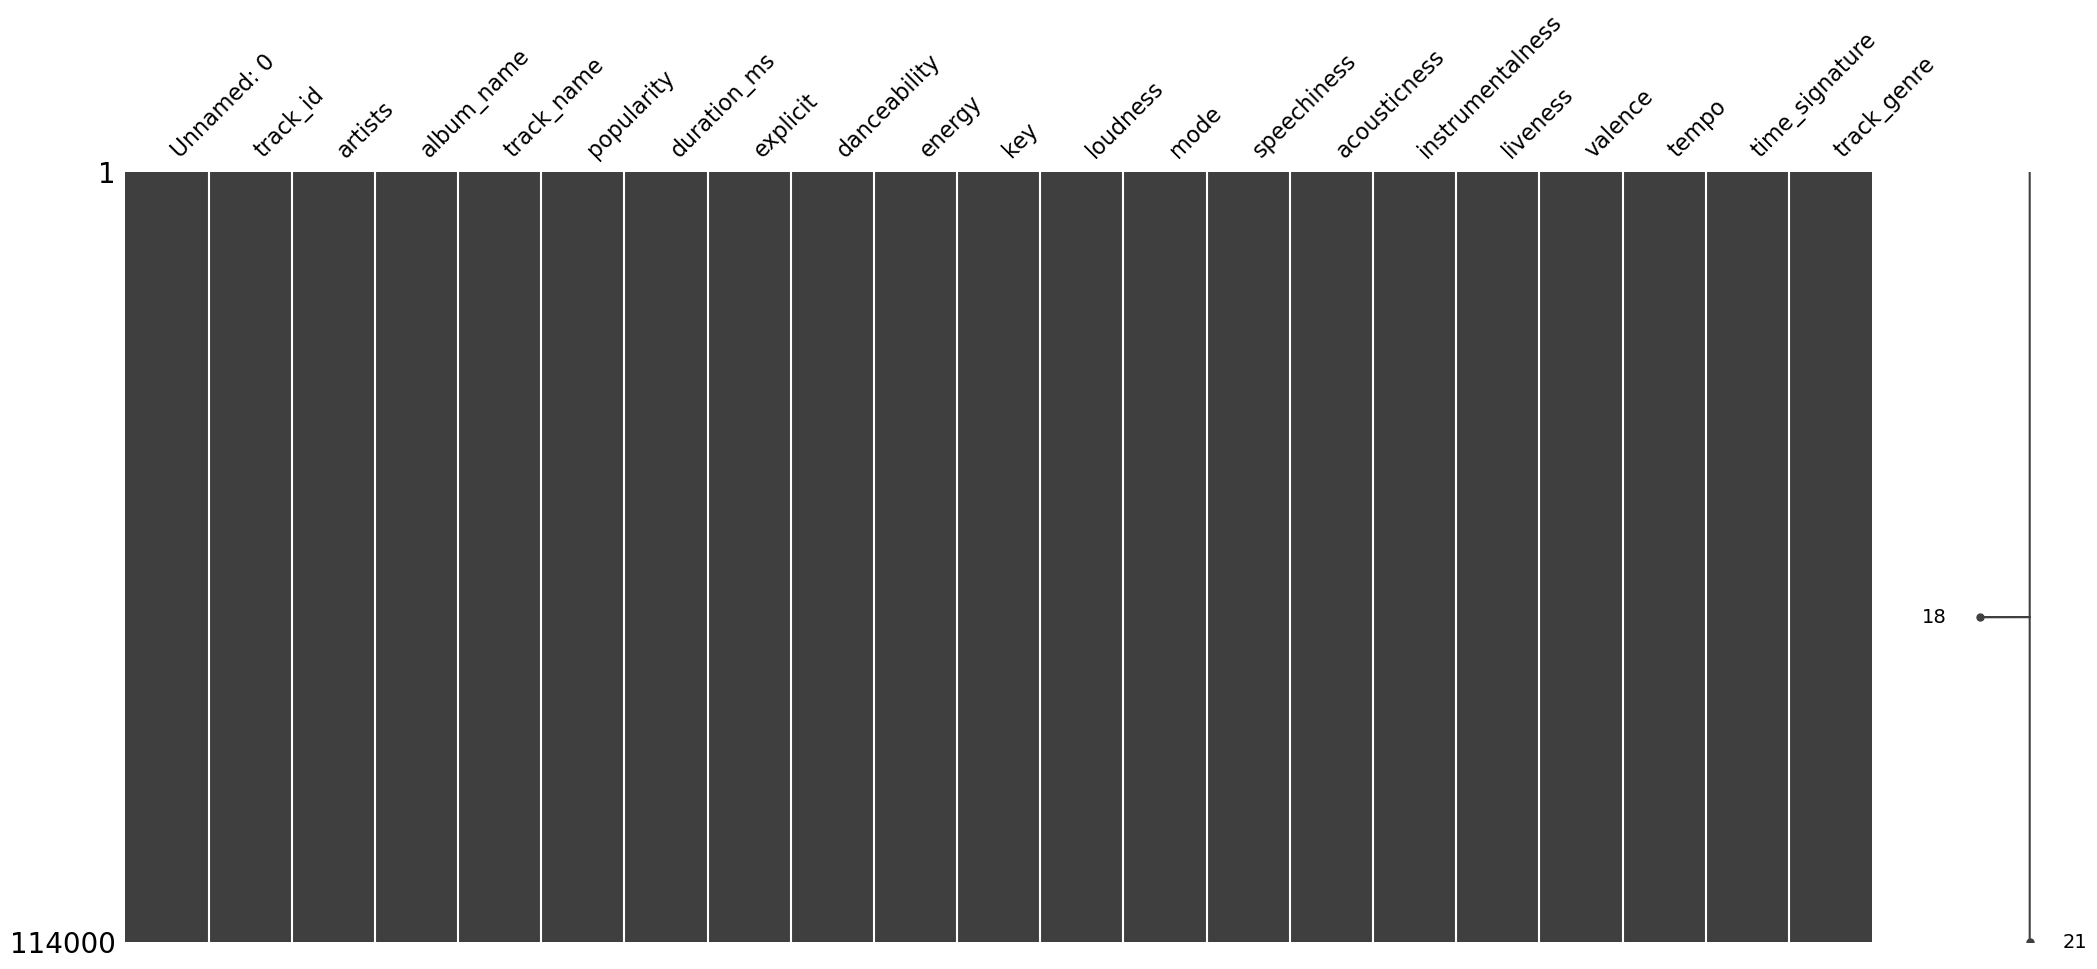

In [7]:
msno.matrix(df)
plt.show()

In [8]:
df = df.dropna()

Podemos ver por medio del gráfico que el dataframe se encuentra con muy pocos valores nulos, sólo una entrada está incompleta y procedimos a borrarla.

### 5.2. Datos duplicados <a class="anchor" id="duplicados"></a>

In [9]:
df.duplicated(subset = ['track_id']).value_counts()

False    89740
True     24259
dtype: int64

In [10]:
df = df.drop_duplicates(subset = ['track_id'])

El total de canciones repetidas asciende a 24259, de un total de 114.000, lo cual es el 21% del dataset, un número realmente alto. Sin embargo, al igual que con los valores tipo NaN, borramos los valores repetidos en el dataset.

## 6. Popularidad <a class="anchor" id="popularidad"></a>
---

En esta sección se analizan los géneros, artistas y canciones de mayor popularidad en el dataset.

In [11]:
df1 = df.copy()
df1.drop(['Unnamed: 0', 'track_id', 'mode', 'key', 'time_signature'], axis = 1, inplace = True)

df1[['artists', 'artist_1']] = df['artists'].str.split(';', n = 1, expand = True)
df1.drop('artist_1', axis = 1, inplace = True)

### 6.1. Géneros <a class="anchor" id="pop_generos"></a>

In [12]:
print('Hay {} géneros en el dataset'.format(df['track_genre'].unique().size))

Hay 113 géneros en el dataset


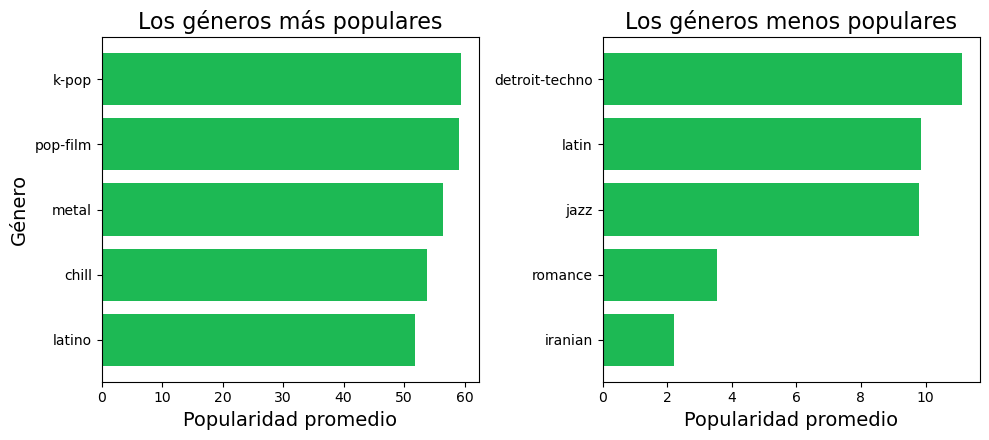

In [13]:
popularity_mean = df1['popularity'].groupby(df1['track_genre']).mean()
most_popular_genres = popularity_mean.sort_values(ascending = False).head(5)
least_popular_genres = popularity_mean.sort_values(ascending = False).tail(5)

fig, axs = plt.subplots(1, 2, figsize = (10, 4.5))

axs[0].barh(most_popular_genres.index[::-1], most_popular_genres[::-1], color = '#1DB954')
axs[1].barh(least_popular_genres.index[::-1], least_popular_genres[::-1], color = '#1DB954')

axs[0].set_xlabel('Popularidad promedio', fontsize = 14)
axs[1].set_xlabel('Popularidad promedio', fontsize = 14)
axs[0].set_ylabel('Popularidad promedio', fontsize = 14)
axs[0].set_ylabel('Género', fontsize = 14)
axs[1].set_title('Los géneros menos populares', fontsize = 16)
axs[0].set_title('Los géneros más populares', fontsize = 16)

plt.tight_layout()
# plt.savefig('Popularidad genero.jpg', dpi = 300)
plt.show()

Se observa que 113 géneros componen el dataset, presentando géneros tan diversos tales como "k-pop", "detroit-techno" y "chill". Los géneros de mayor popularidad promedio poseen todos más de 50 puntos, presentando diversidad de géneros. Dicha diversidad tambien está presente en los géneros menos populares, poseeyendo valores en torno los 10 puntos de popularidad promedio.

### 6.2. Artistas <a class="anchor" id="pop_artistas"></a>

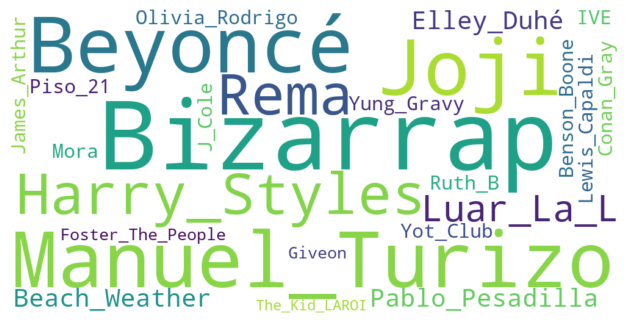

In [14]:
popular_artists = df1['popularity'].groupby(df1['artists']).mean()
most_popular_artists = popular_artists.sort_values(ascending = False).head(25)

text = list(most_popular_artists.index)
text2 = [text[i].replace(' ', '_') for i in range(len(text))]
text3 = [text2[i].replace('.', '') for i in range(len(text2))]
string = (" ").join(text3)

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(string)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.tight_layout()
# plt.savefig('Popularidad artistas.jpg', dpi = 300)
plt.show()

El Word Cloud muestra los 25 artistas más populares, la mayoría de ellos son artistas vigentes y de gran difusión en la actualidad. Esto ilustra en gran medida los gustos de los oyentes, dando una idea aproximada de los artistas que más seran solicitados al algoritmo de recomendación de canciones. 

### 6.3. Canciones <a class="anchor" id="pop_canciones"></a>

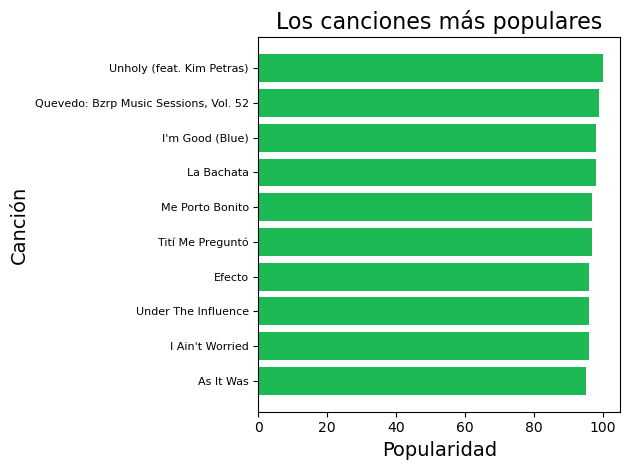

In [22]:
df2 = df1[['artists', 'popularity', 'track_name', 'track_genre']].sort_values(['popularity'], ascending = False).head(10)

plt.barh(df2['track_name'][::-1], df2['popularity'][::-1], color = '#1DB954')
plt.xlabel('Popularidad', fontsize = 14)
plt.ylabel('Canción', fontsize = 14)
plt.yticks(fontsize = 8)
plt.title('Los canciones más populares', fontsize = 16)

plt.tight_layout()
# plt.savefig('Popularidad canciones.jpg', dpi = 300)
plt.show()

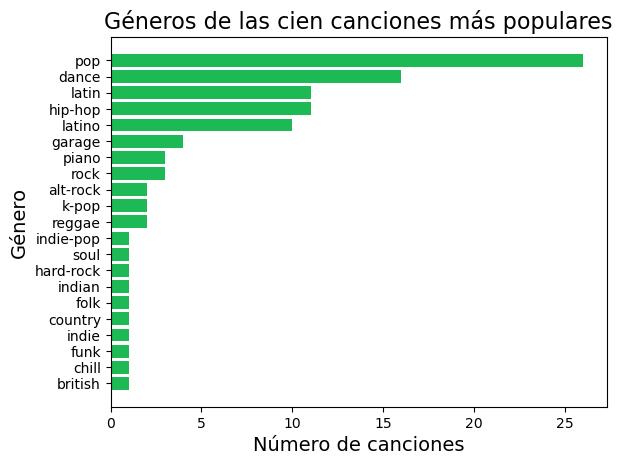

In [16]:
df3 = df1[['artists', 'popularity', 'track_name', 'track_genre']].sort_values(['popularity'], ascending = False).head(100)
popular_songs_genre = df3['track_genre'].value_counts()

plt.barh(popular_songs_genre.index[::-1], popular_songs_genre[::-1], color = '#1DB954')
plt.xlabel('Número de canciones', fontsize = 14)
plt.ylabel('Género', fontsize = 14)
plt.title('Géneros de las cien canciones más populares', fontsize = 16)
# plt.savefig('Popularidad genero 2.jpg', dpi = 300)
plt.show()

Por otro lado, si analizamos las canciones más populares y los géneros de dichas canciones, encontramos que en su mayoría que estas canciones pertenecen a los géneros "pop", "dance", "latin" y "latino". Estas canciones, en general son buscadas por su altos valores de "liveness" y "danceability", es decir, son canciones muy bailables.  

## 7. Duración <a class="anchor" id="duracion"></a>
---

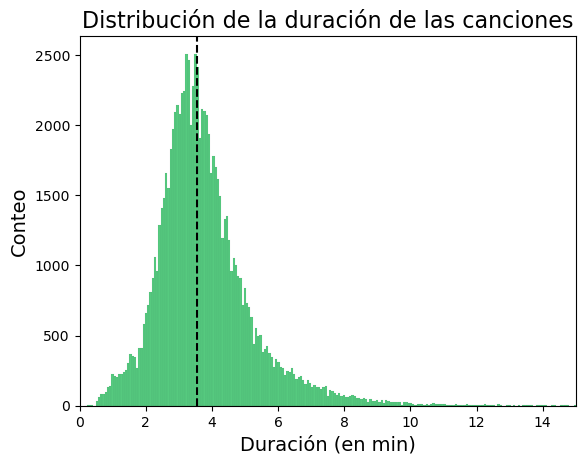

In [17]:
df1['duration_min'] = (df1['duration_ms']/(60 * 1000)).round(2)
df1.drop('duration_ms', axis = 1, inplace = True)

sns.histplot(df1['duration_min'], color = '#1DB954')
plt.axvline(median(df1['duration_min']), c = 'black', ls = '--')
plt.xlim(0, 15)
plt.xlabel('Duración (en min)', fontsize = 14) 
plt.ylabel('Conteo', fontsize = 14) 
plt.title('Distribución de la duración de las canciones', fontsize = 16)
# plt.savefig('Duracion.jpg', dpi = 300)
plt.show()

La duración de las canciones presenta esta distribución, con una mediana en torno a los 3,6 minutos, aunque hay canciones que superan holgadamente los 15 minutos que abarca este gráfico.

## 8. Letras explicítas <a class="anchor" id="explicito"></a>
---

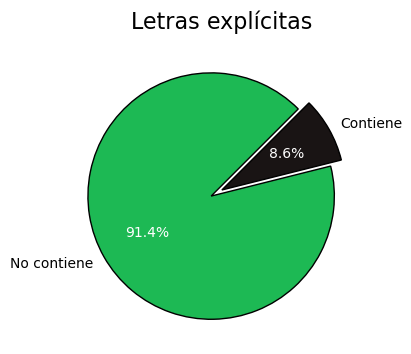

In [18]:
plt.figure(figsize = (4,4))
_, _, autotexts = plt.pie(df1.groupby('explicit').size(), labels = ('No contiene', 'Contiene'), explode = (0.1, 0), startangle = 45, autopct = '%1.1f%%', colors = ['#1DB954', '#191414'], wedgeprops = {"edgecolor" : "black", 'linewidth': 1})
for ins in autotexts:
    ins.set_color('white')

plt.title('Letras explícitas', fontsize = 16)
# plt.savefig('Letras explicitas.jpg', dpi = 300)
plt.show()

Se encuentra que el 8.6 % de las canciones poseen letras explíctas. Esta es otra variable a considerar, filtrar las canciones no explícitas de las explícitas es de utilidad para padres que buscan no exponer a sus hijos de corta edad a letras no aptas para menores.

## 9. Gráficos de cajas de las variables <a class="anchor" id="cajas"></a>
---

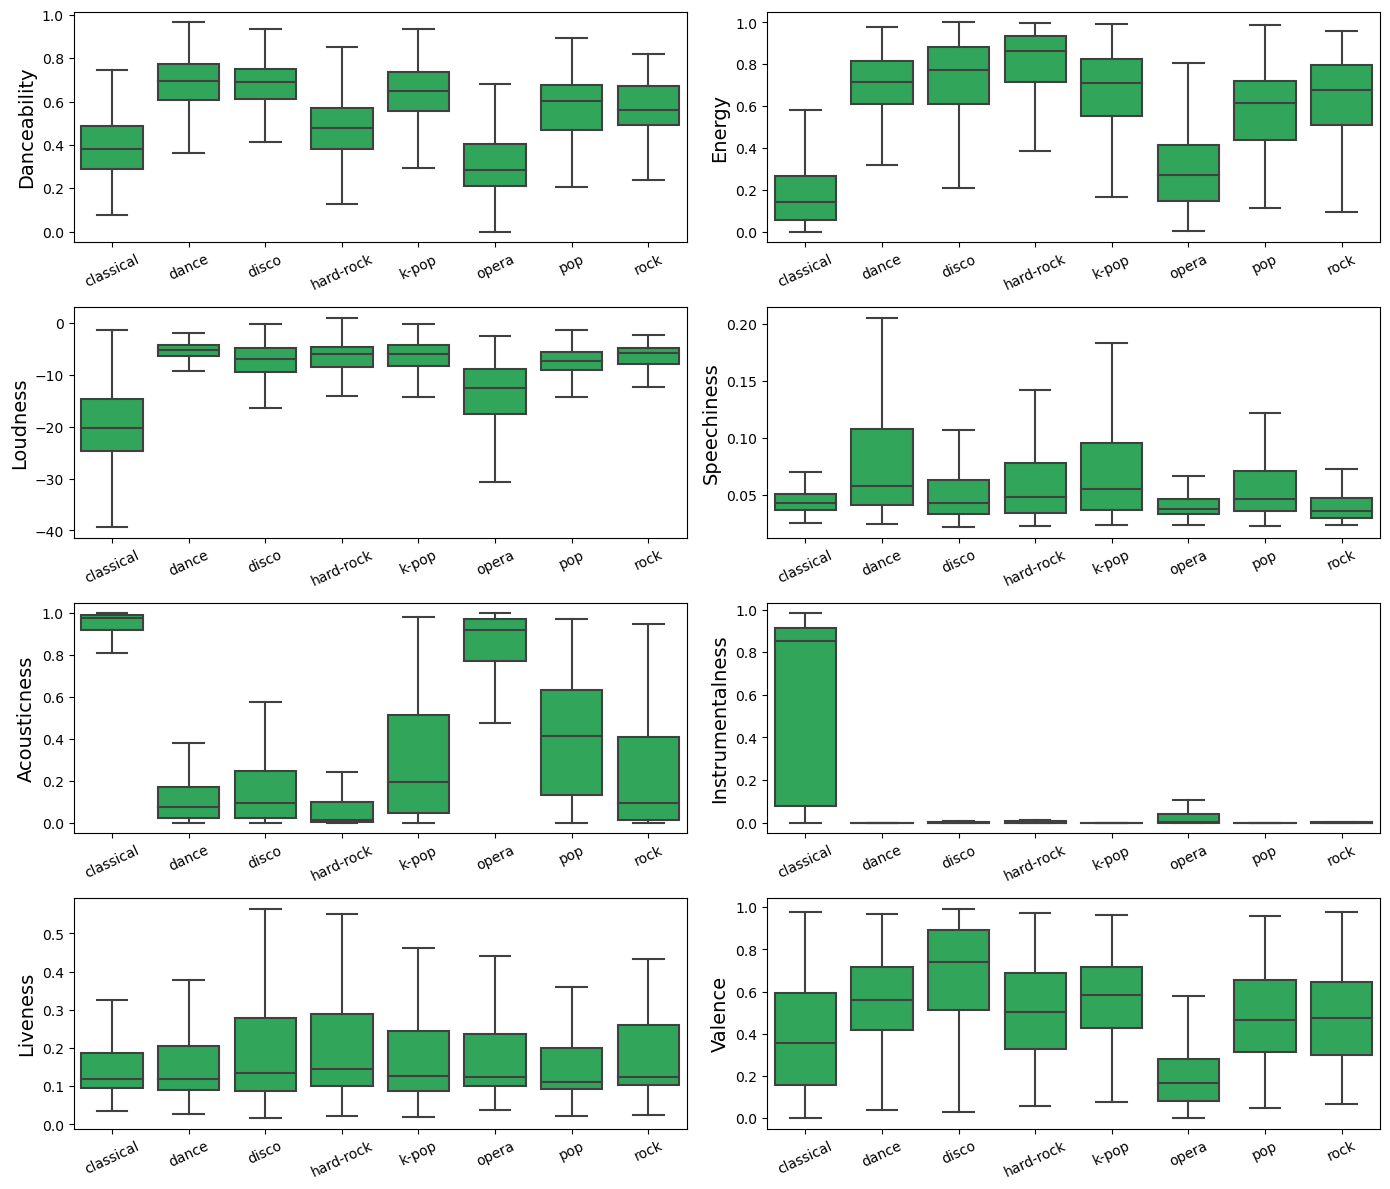

In [19]:
df_seleccion = df1[df1['track_genre'].isin(['classical', 'opera', 'rock', 'hard-rock', 'pop', 'k-pop', 'dance', 'disco'])]

columns = df_seleccion.columns[4:-3] # Selecciono los parámetros que considero más relevantes

l = [i for i in columns if i not in ['explicit', 'mode']]

plt.figure(figsize = (14, 12))
      
for x, column in zip(range(12), df_seleccion[l]):
    
    plt.subplot(int(len(l)/2), 2, x + 1)
    sns.boxplot(data = df_seleccion, y = column, x = df_seleccion['track_genre'], color = '#1DB954', showfliers = False) 
    # Filtro los outliers porque distorsionan los gráficos, dificultando apreciar las diferencias
    
    plt.xticks(rotation = 25)
    plt.xlabel("")
    plt.ylabel(l[x].capitalize(), fontsize = 14)
    
plt.tight_layout()
# plt.savefig('Grafico cajas.jpg', dpi = 300)

En estos gráficos de cajas se puede observar que los distintos géneros presentan diferencias sustanciales entre las variables, como se mencionó en la entrega anterior esto es el primer argumento para hacer emplear un algoritmo de clasificación para armar el sistema de recomendación de canciones. Por otro lado, si comparamos entre los pares "classical" - "opera", "dance" - "disco", "rock" - "hard-rock" y "pop" - "k-pop", notamos que presentan cierta similitud por lo que factible que un cliente que escuche ópera posiblemente le guste escuchar música clásica. Esto permite que el sistema de recomendación tenga cierto márgen para ofrecer géneros nuevos pero similares a los que la audiencia ya escuche. 

## 10. Histogramas de frecuencias de las variables <a class="anchor" id="histogramas"></a>
---

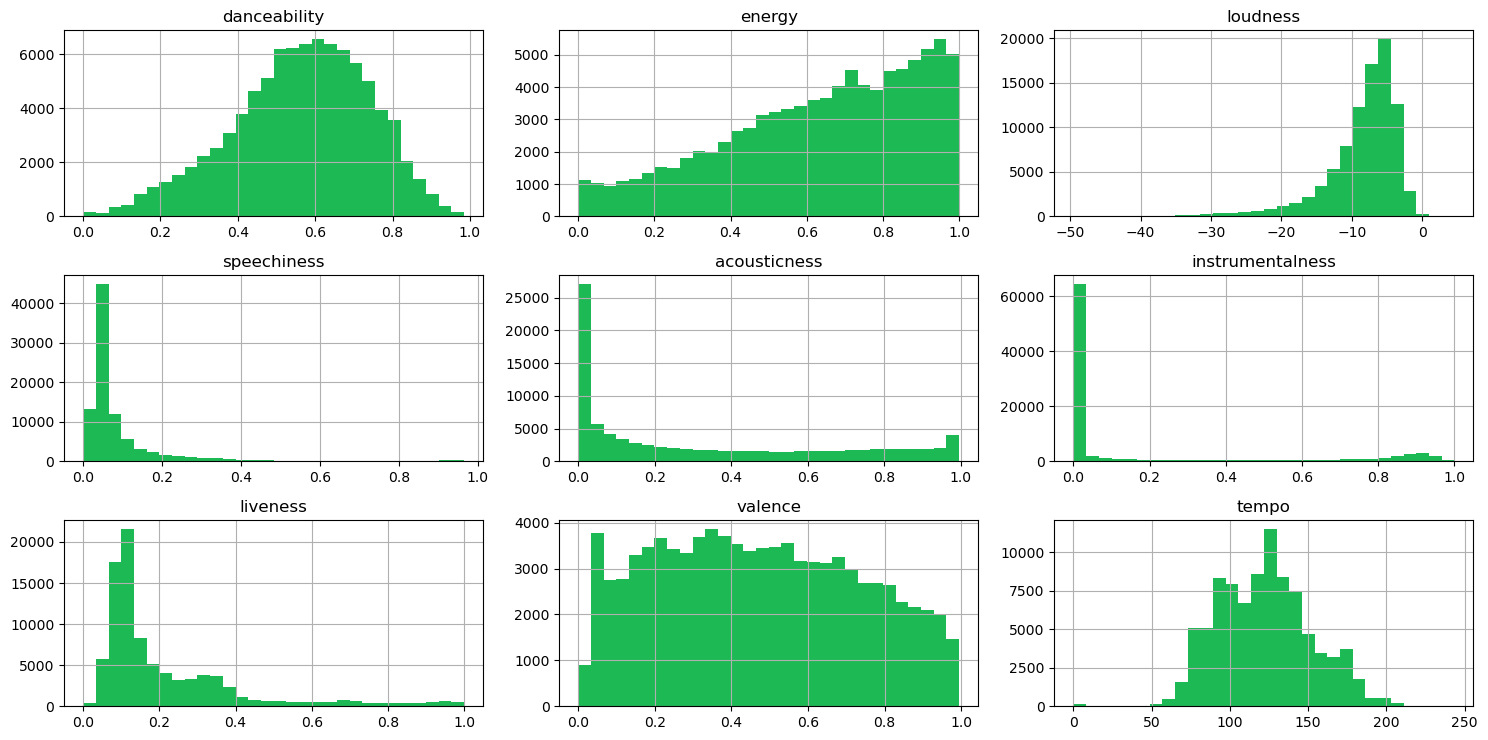

In [20]:
df1.iloc[:, 5:-1].hist(bins = 30, figsize = (15, 7.5), color = '#1DB954')
plt.tight_layout()
# plt.savefig('Histogramas.jpg', dpi = 300)
plt.show()

Los histogramas de las variables numéricas del dataset muestran un gran abanico de distribuciones, es por esto que deberá tenerse especial cuidado a la hora de plantear la estandarización de estos datos. Variables como "tempo" y "danceablility" ya tienen un comportamiento similar al normal o distribuciones similares a log-normal ("loudness", "liveness") y otras variables presentan valores discretos. Existen numerosos algoritmos de estandarización y habrá que estudiarlos y evaluarlos antes de proceder.

## 11. Correlaciones entre las variables <a class="anchor" id="correlaciones"></a>
---

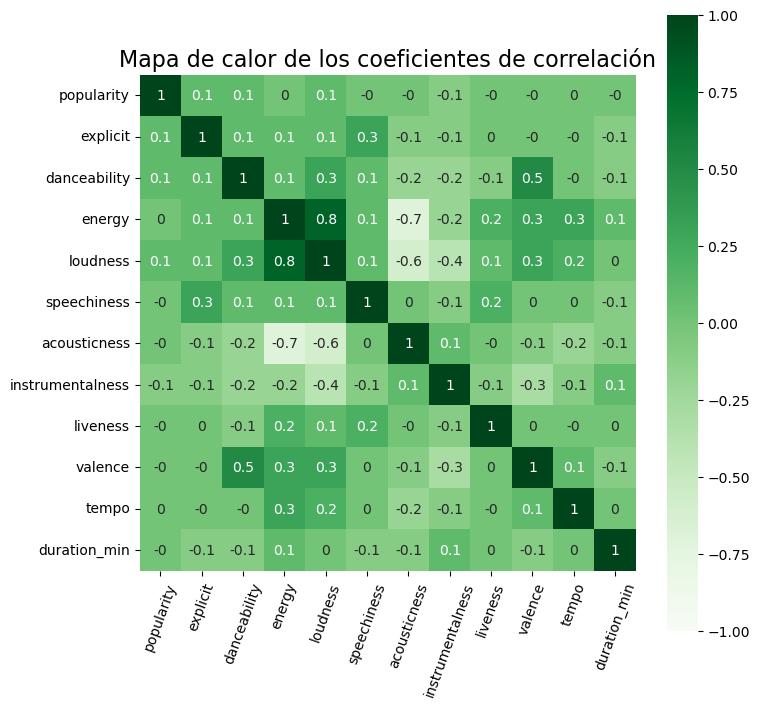

In [21]:
plt.figure(figsize = (8,8))
plt.axis('scaled')
sns.heatmap(df1.corr(numeric_only = True).round(1), vmin=-1, vmax=1, cmap = "Greens", cbar = True, annot = True)
plt.xticks(rotation = 70)
plt.title('Mapa de calor de los coeficientes de correlación', fontsize = 16)
# plt.savefig('Correlaciones.jpg', dpi = 300)
plt.show()

Finalizamos el análisis exploratorio con un mapa de calor que visualiza las correlaciones presentes en los datos. Este gráfico muestra resumidamente pares de variables que presentan correlaciones de distinto grado. Algunas pares presentan fuerte correlación (por ejemplo: energy y loudness, energy y acousticness) con lo que se podría pensar en disminuir el número de variables a la hora de entrenar el algoritmo de recomendación.

## 12. Insights y recomendaciones <a class="anchor" id="ins&recom"></a>
---

En función del analisis exploratorio del dataset se presentan los siguientes insights:

- El dataset consiste en 113 géneros musicales, y cada uno de ellos está compuesto por mil canciones, esto ofrece una buena representatividad que será beneficiosa para los algoritmos de aprendizaje automático.

- Los datos estan completos y bien formateados, sin embargo existe un buen número de entradas repetidas. El trabajo de data wrangling requerido no será muy extensivo.

- Las canciones más populares pertenecen, en su gran mayoría, a los géneros pop, hip-hop y latino. En consecuencia, los artistas más populares son los que se dedican a los mencionados géneros. 

- Las canciones más elegidas por los usuarios son aquellas que transmiten mayor energía, emociones típicamente calificadas como positivas y voluntad de bailar.

- Se compararon cada una de las variables en función del género musical, encontrando diferencias que pueden ser sutiles o drásticas, según los géneros considerados. Esto permitiría agrupar a los géneros similares en grandes grupos.

- Los histogramas de las variables del dataset muestran un gran abanico de distribuciones. Además, diversos pares de variables presentan elevados coeficientes de correlación.

Y a su vez, en respuesta a los insight, se plantean las recomendaciones que continúan:

- Analizar diferentes criterios de normalizacion de los datos.

- Para el sistema de clasificación: evaluar algortimos de clasificación tales como KNeighbors, Gaussian Naive Bayes, Decision Tree, etc.

- Para el sistema de recomendación: evaluar algoritmos de clustering, como por ejemplo: KMeans, DBSCAN, AGNES, etc.